In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns

from copy import deepcopy
import warnings
import pytz
import time
import numpy as np
import pandas as pd
import pickle
from datetime import datetime, timedelta
from enum import Enum
from collections import namedtuple, defaultdict
import gzip
import random
import os
import json
import polars as pl

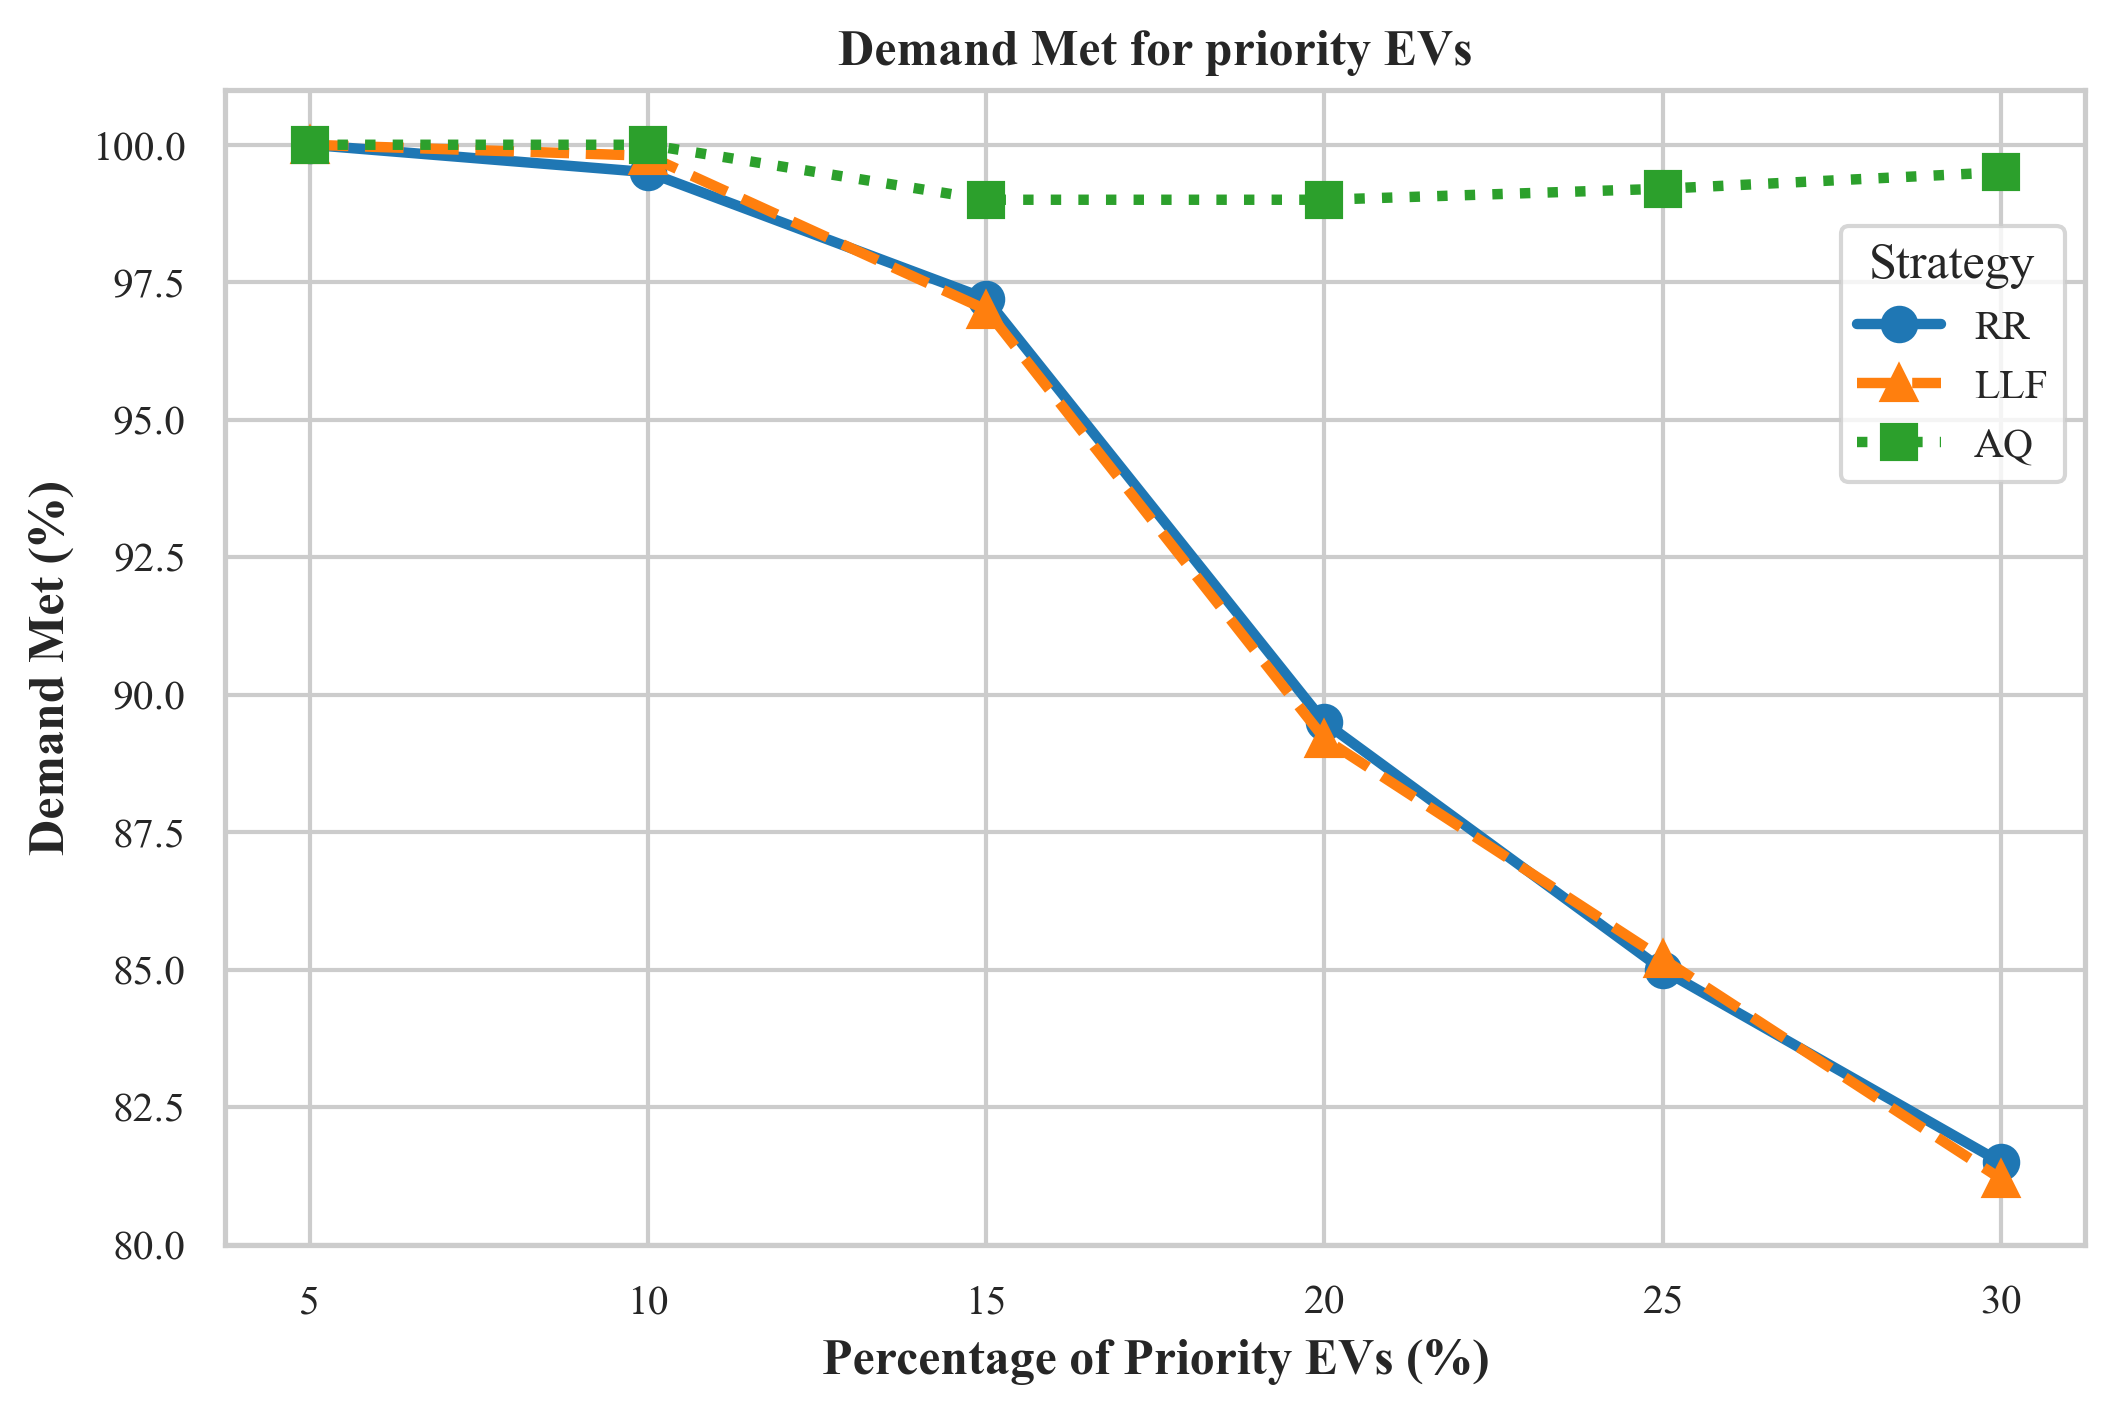

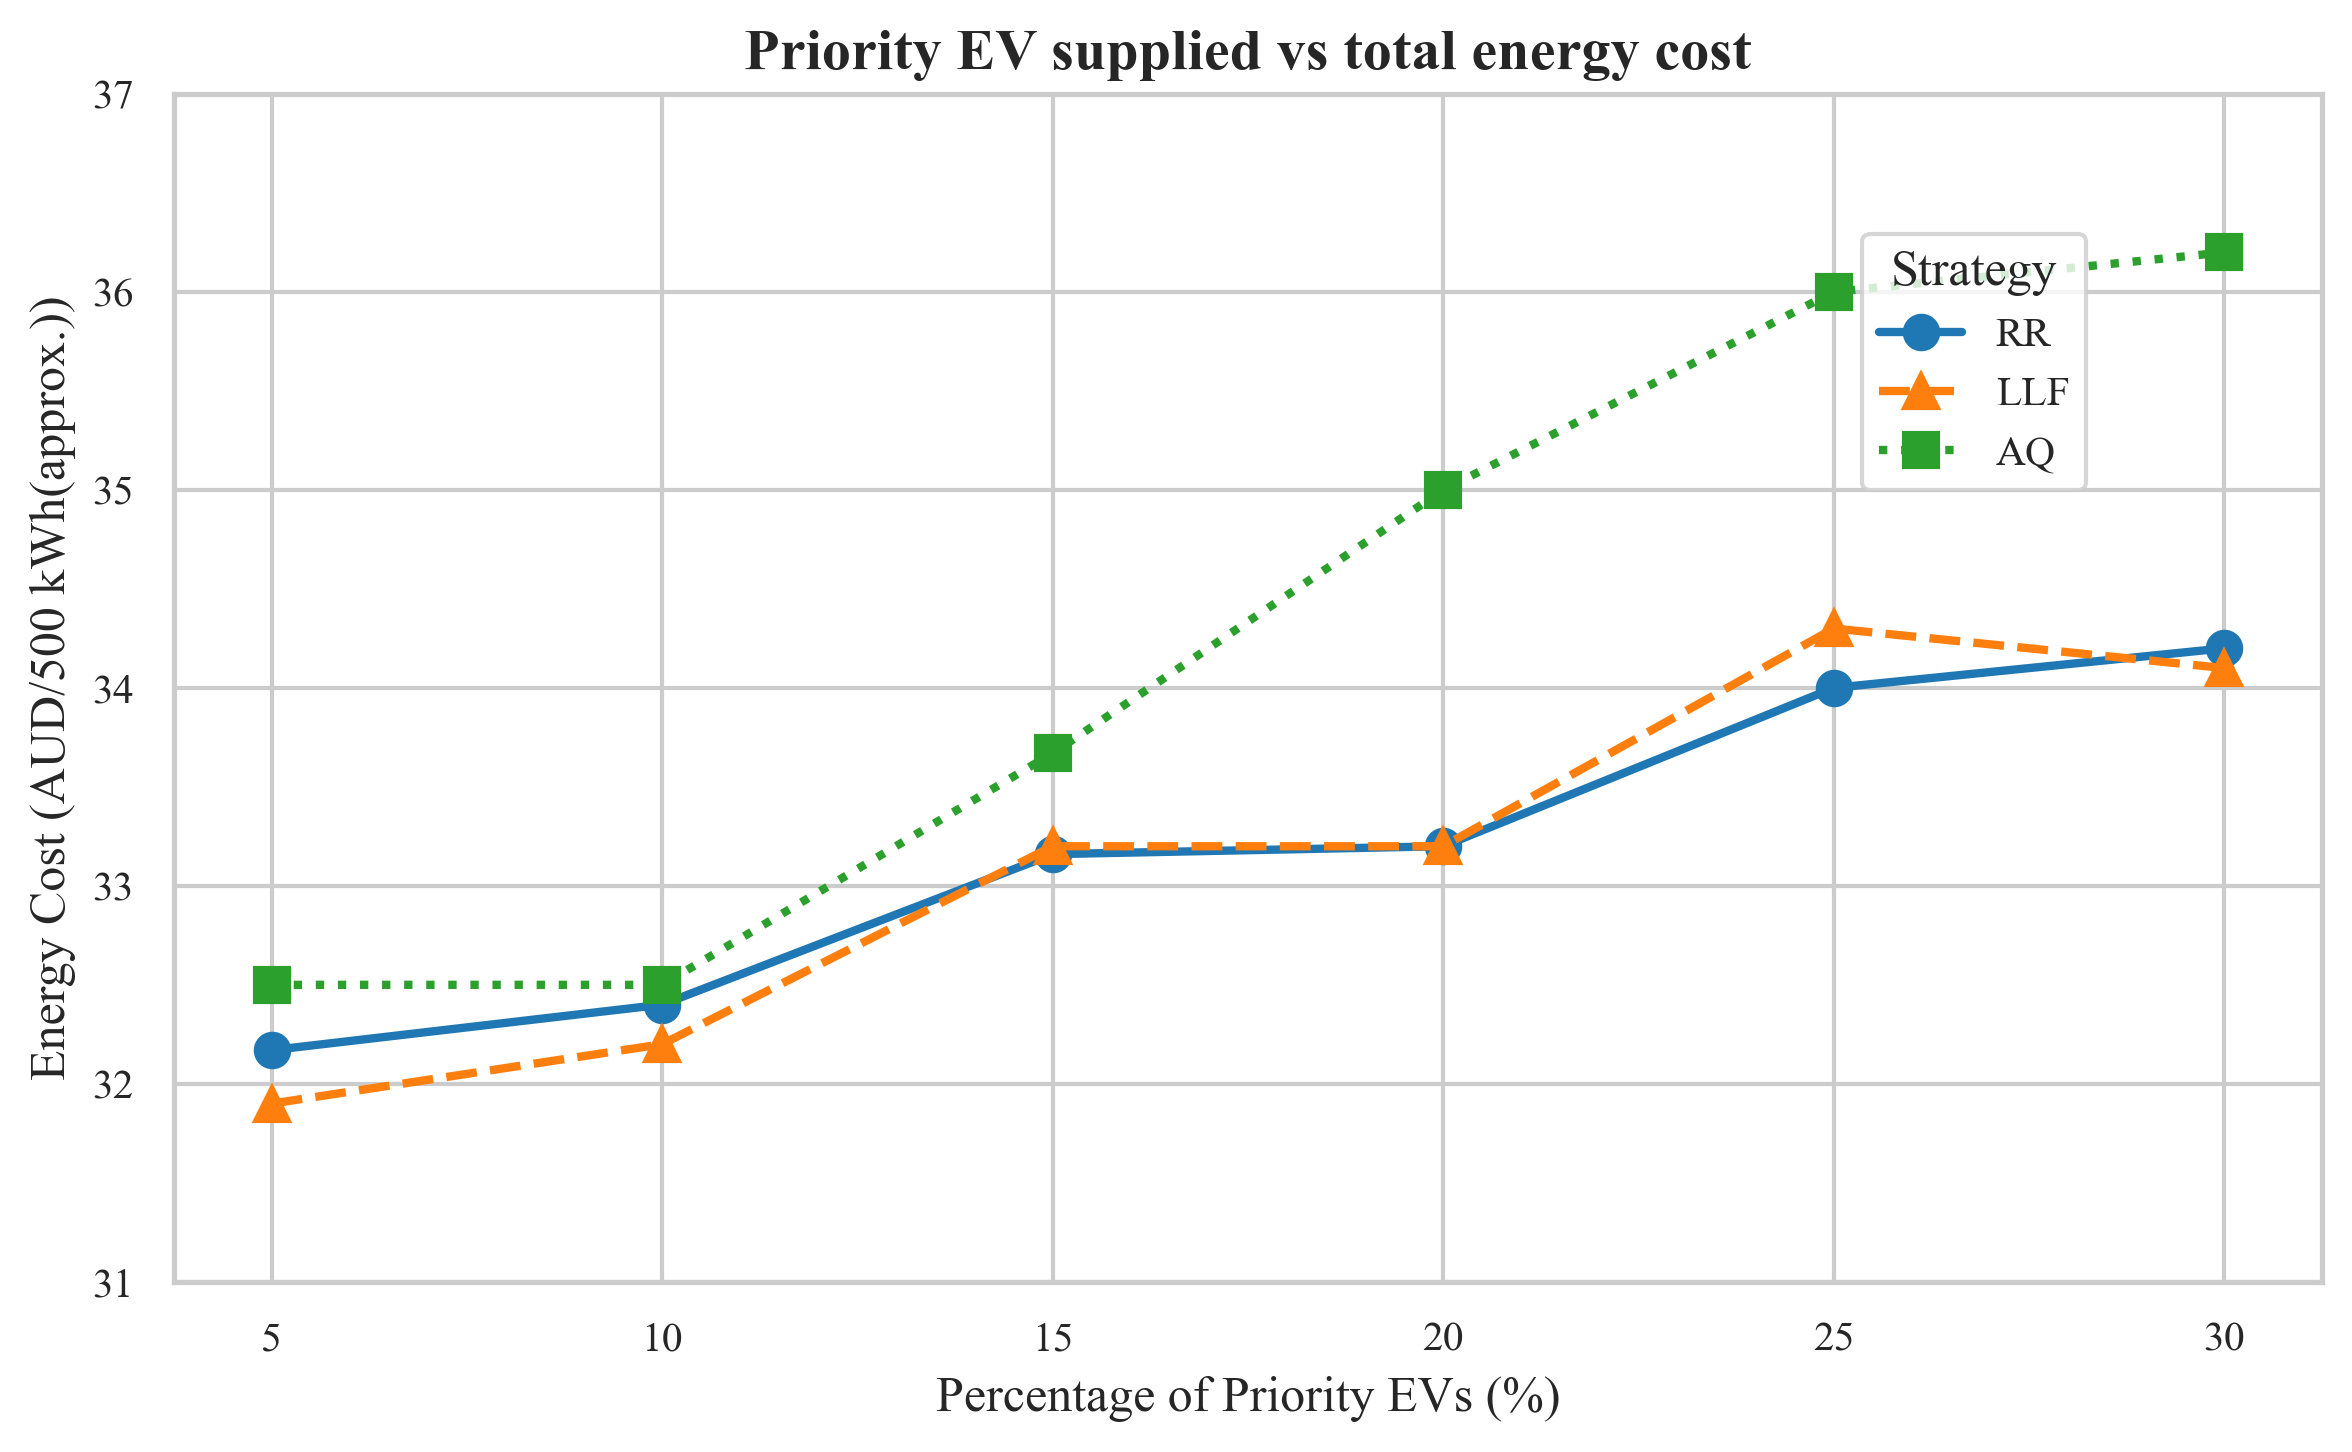

In [9]:
# --- Data Preparation ---

# Data for the first plot: Demand Met
demand_data = {
    'priority_ev (%)': [5, 10, 15, 20, 25, 30],
    'RR': [100, 99.5, 97.2, 89.5, 85, 81.5],
    'LLF': [100, 99.8, 97, 89.2, 85.2, 81.2],
    'AQ': [100, 100, 99, 99, 99.2, 99.5]
}
df_demand = pd.DataFrame(demand_data)

# Data for the second plot: Energy Cost
energy_data = {
    'priority_ev (%)': [5, 10, 15, 20, 25, 30],
    'RR': [32.17, 32.4, 33.16, 33.2, 34, 34.2],
    'LLR': [31.9, 32.2, 33.2, 33.2, 34.3, 34.1],
    'AQ': [32.5, 32.5, 33.67, 35, 36, 36.2]
}

df_energy = pd.DataFrame(energy_data)

# --- Plotting Configuration ---
# Set a professional style for the plots.
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Define markers and line styles for clarity.
markers = ['o', '^', 's']
linestyles = ['-', '--', ':']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Blue, Orange, Green

# --- Plot 1: Demand Met Analysis ---
fig1, ax1 = plt.subplots(figsize=(8, 5), dpi=300)

for i, column in enumerate(df_demand.columns[1:]):
    ax1.plot(df_demand['priority_ev (%)'], df_demand[column],
             marker=markers[i],
             linestyle=linestyles[i],
             color=colors[i],
             label=column)

# Set titles and labels for the first plot.
ax1.set_title('Demand Met for priority EVs', fontsize=12, fontweight='bold')
ax1.set_xlabel('Percentage of Priority EVs (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Demand Met (%)', fontsize=12, fontweight='bold')
ax1.set_ylim(80, 101) # Adjust y-axis for better spacing
ax1.set_xticks(df_demand['priority_ev (%)']) # Ensure all x-ticks are shown
ax1.legend(title='Strategy', fontsize=10, loc='upper right', bbox_to_anchor=(1, 0.9))

# --- Plot 2: Energy Cost Analysis ---
fig2, ax2 = plt.subplots(figsize=(8, 5), dpi=300)

for i, column in enumerate(df_energy.columns[1:]):
    # Rename 'LLR' to 'LLF' for consistency in the legend if desired, matching the first graph's likely intent.
    label_name = 'LLF' if column == 'LLR' else column
    ax2.plot(df_energy['priority_ev (%)'], df_energy[column],
             marker=markers[i],
             linestyle=linestyles[i],
             linewidth=2,
             color=colors[i],
             label=label_name)

# Set titles and labels for the second plot.
ax2.set_title('Priority EV supplied vs total energy cost', fontsize=14, fontweight='bold')
ax2.set_xlabel('Percentage of Priority EVs (%)', fontsize=12)
ax2.set_ylabel('Energy Cost (AUD/500 kWh(approx.))', fontsize=12)
ax2.set_ylim(31, 37) # Adjust y-axis for better spacing
ax2.set_xticks(df_energy['priority_ev (%)']) # Ensure all x-ticks are shown
ax2.legend(title='Strategy', fontsize=10, loc='upper right', bbox_to_anchor=(0.9, 0.9))


# --- Display and Save Plots ---
# Show the plots.
plt.tight_layout()
plt.show()

file_basename = "C:\\Users\\s3955218\\OneDrive - RMIT University\\PhD Writing\\Journal\\RQ2\\Simualtion_results\\15evse\\demand_met_analysis"

# Save the figures to files.
fig1.savefig(f"{file_basename}.png", dpi=300, bbox_inches='tight')
# fig2.savefig('energy_cost_analysis.png', bbox_inches='tight')

#### Cost and priority ev served 

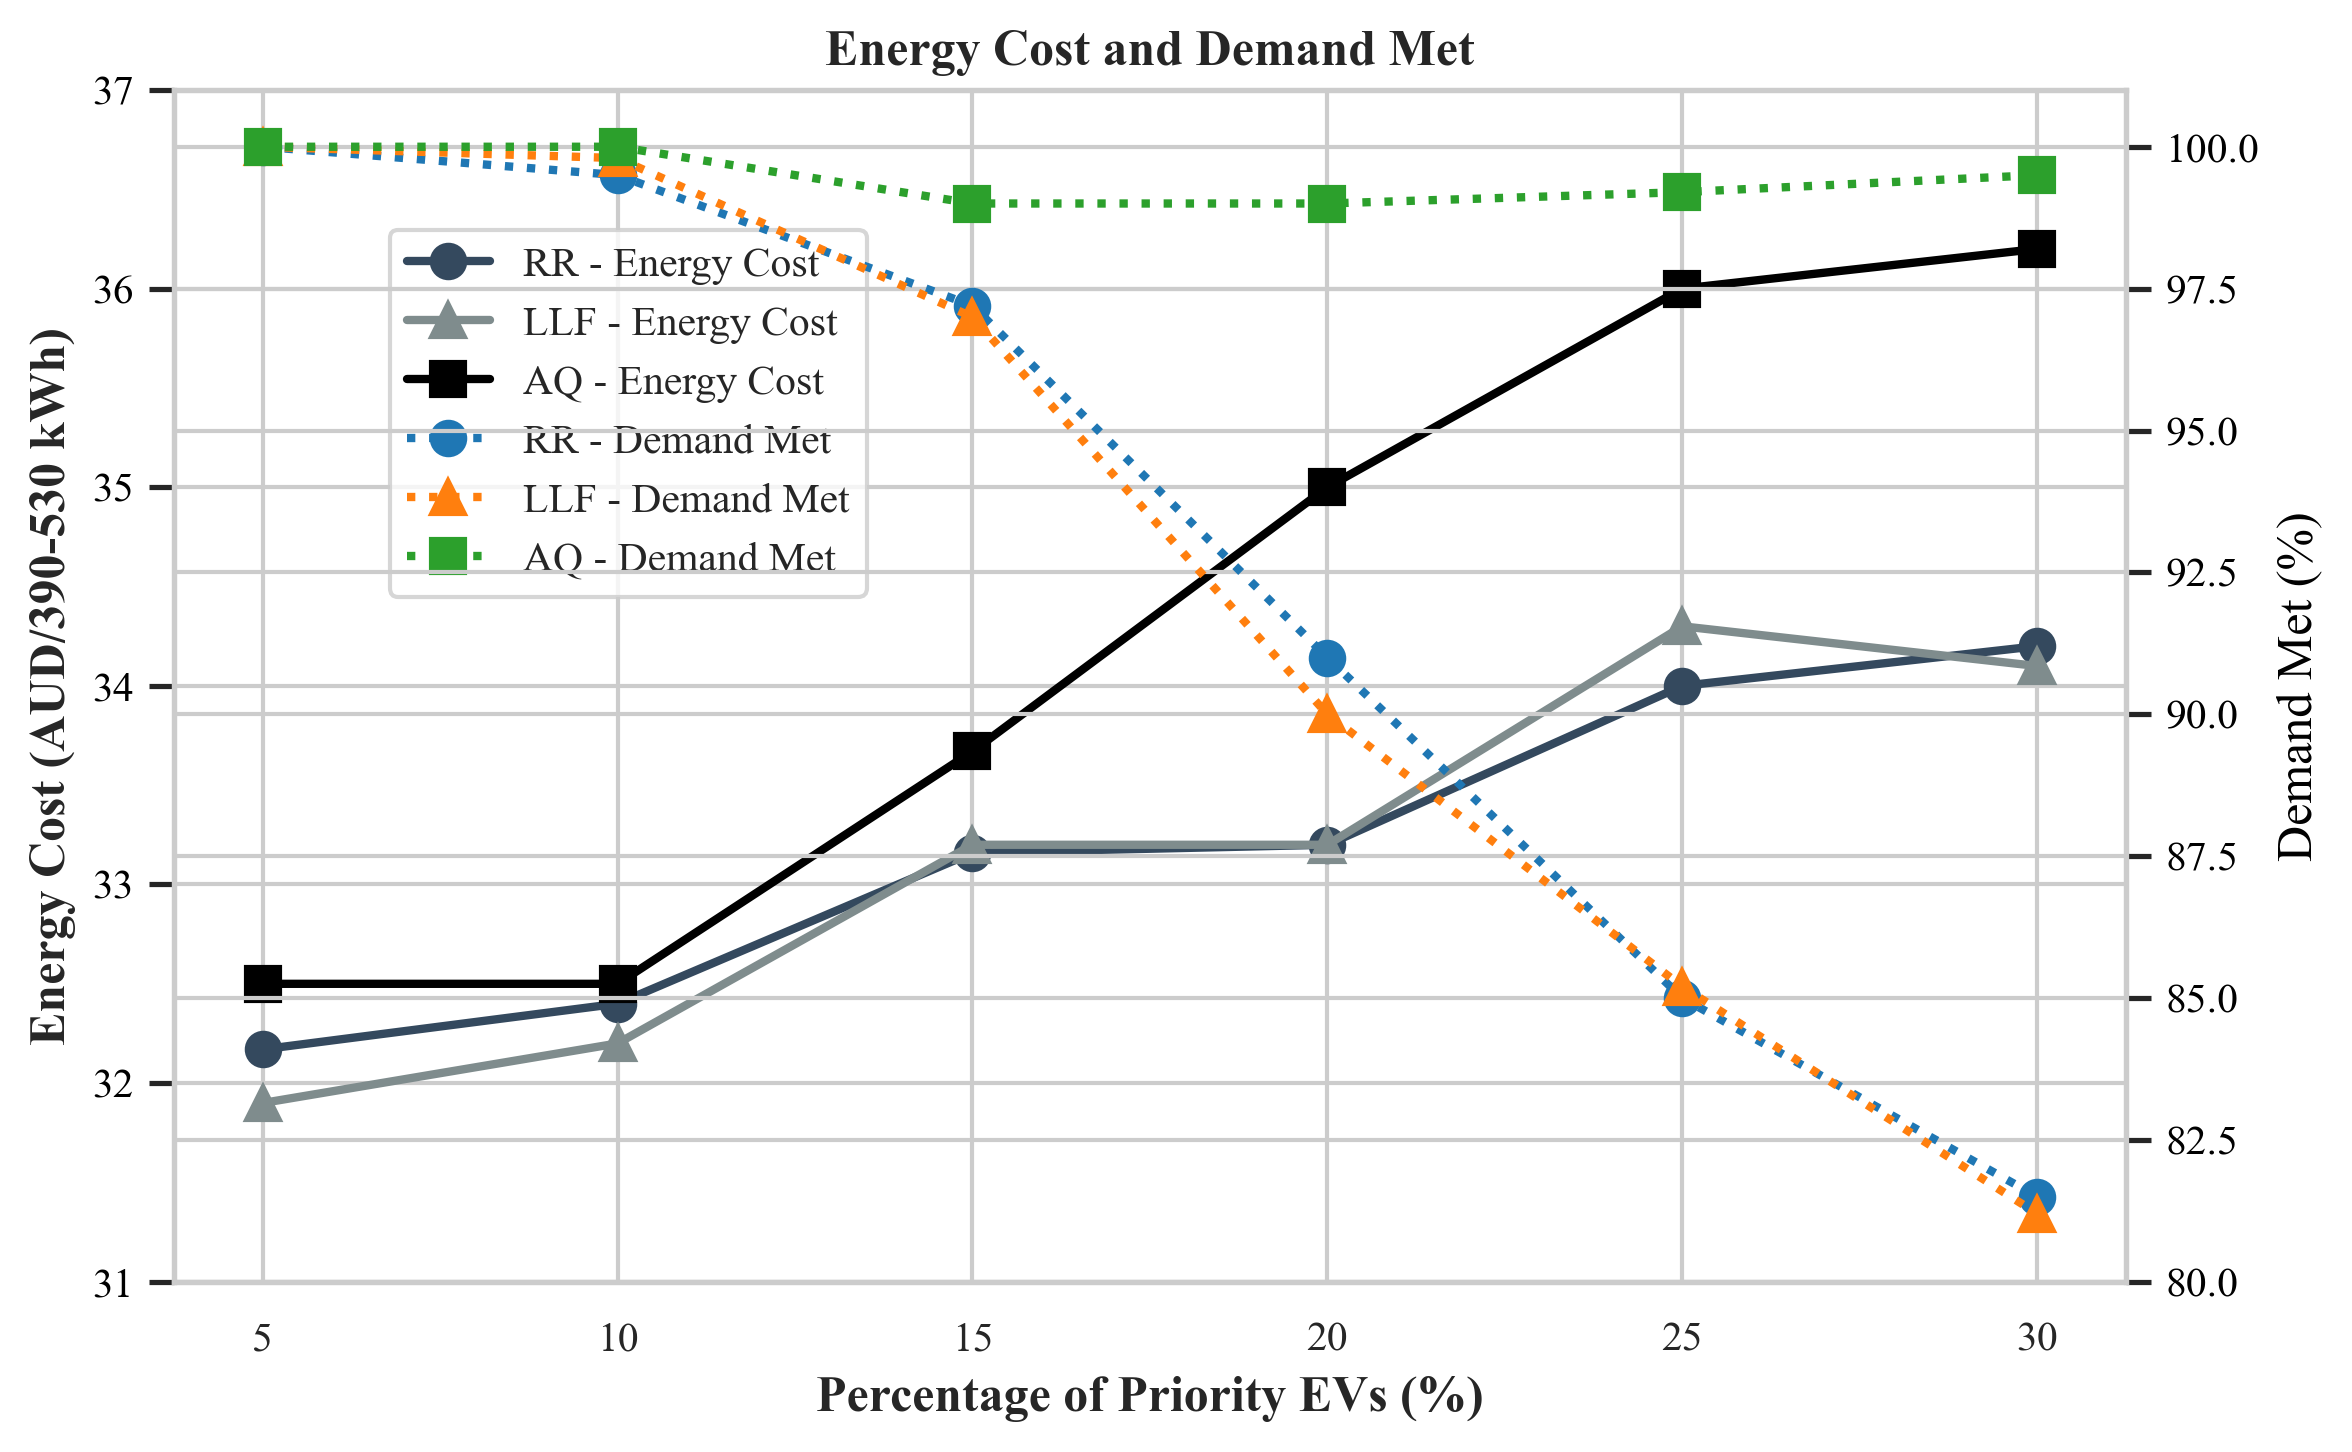

In [ ]:
# --- Data Preparation ---
demand_data = {
    'priority_ev (%)': [5, 10, 15, 20, 25, 30],
    'RR': [100, 99.5, 97.2, 91, 85, 81.5],
    'LLF': [100, 99.8, 97, 90, 85.2, 81.2],
    'AQ': [100, 100, 99, 99, 99.2, 99.5]
}
df_demand = pd.DataFrame(demand_data)

energy_data = {
    'priority_ev (%)': [5, 10, 15, 20, 25, 30],
    'RR': [32.17, 32.4, 33.16, 33.2, 34, 34.2],
    'LLF': [31.9, 32.2, 33.2, 33.2, 34.3, 34.1],
    'AQ': [32.5, 32.5, 33.67, 35, 36, 36.2]
}
df_energy = pd.DataFrame(energy_data)

# --- Plotting Configuration ---
# Set a professional style for the plots.
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
colors_cost = ['#34495E', '#7F8C8D', '#000000'] 
markers = ['o', '^', 's']
# Use different linestyles for each metric to ensure clarity
energy_linestyles = ['-', '-', '-'] # Solid lines for Energy Cost
demand_linestyles = [':', ':', ':'] # Dotted lines for Demand Met

# --- Combined Double-Axis Plot ---
fig, ax1 = plt.subplots(figsize=(8, 5), dpi=300)

# Set the main title and x-axis label
ax1.set_title('Energy Cost and Demand Met', fontsize=12, fontweight='bold')
ax1.set_xlabel('Percentage of Priority EVs (%)', fontsize=12)
ax1.set_xticks(df_energy['priority_ev (%)'])

# Create the second Y-axis for Demand Met, sharing the x-axis
ax2 = ax1.twinx()

# Plot 1: Energy Cost on the primary Y-axis (ax1)
ax1.set_ylabel('Energy Cost (AUD/390-530 kWh)', fontsize=12)
for i, column in enumerate(df_energy.columns[1:]):
    # Rename 'LLR' to 'LLF' for consistency in the legend
    label_name = 'LLF' if column == 'LLR' else column
    ax1.plot(df_energy['priority_ev (%)'], df_energy[column],
             color=colors_cost[i],
             marker=markers[i],
             linestyle=energy_linestyles[i],
             linewidth=2,
             label=f'{label_name} - Energy Cost')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(31, 37)

# Plot 2: Demand Met on the secondary Y-axis (ax2)
ax2.set_ylabel('Demand Met (%)', fontsize=12, color='black')
for i, column in enumerate(df_demand.columns[1:]):
    ax2.plot(df_demand['priority_ev (%)'], df_demand[column],
             color=colors[i],
             marker=markers[i],
             linestyle=demand_linestyles[i],
             linewidth=2,
             label=f'{column} - Demand Met')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(80, 101)

# --- Combined Legend ---
# Get handles and labels from both axes to create a single, unified legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Adjust layout to make room for all elements and prevent labels from overlapping
fig.tight_layout()

# Save the figure to a file
file_basename = "C:\\Users\\s3955218\\OneDrive - RMIT University\\PhD Writing\\Journal\\RQ2\\Simualtion_results\\15evse\\energy_cost_demand_met_analysis"
fig.savefig(f"{file_basename}.png", dpi=300, bbox_inches='tight')

#### Overall performance

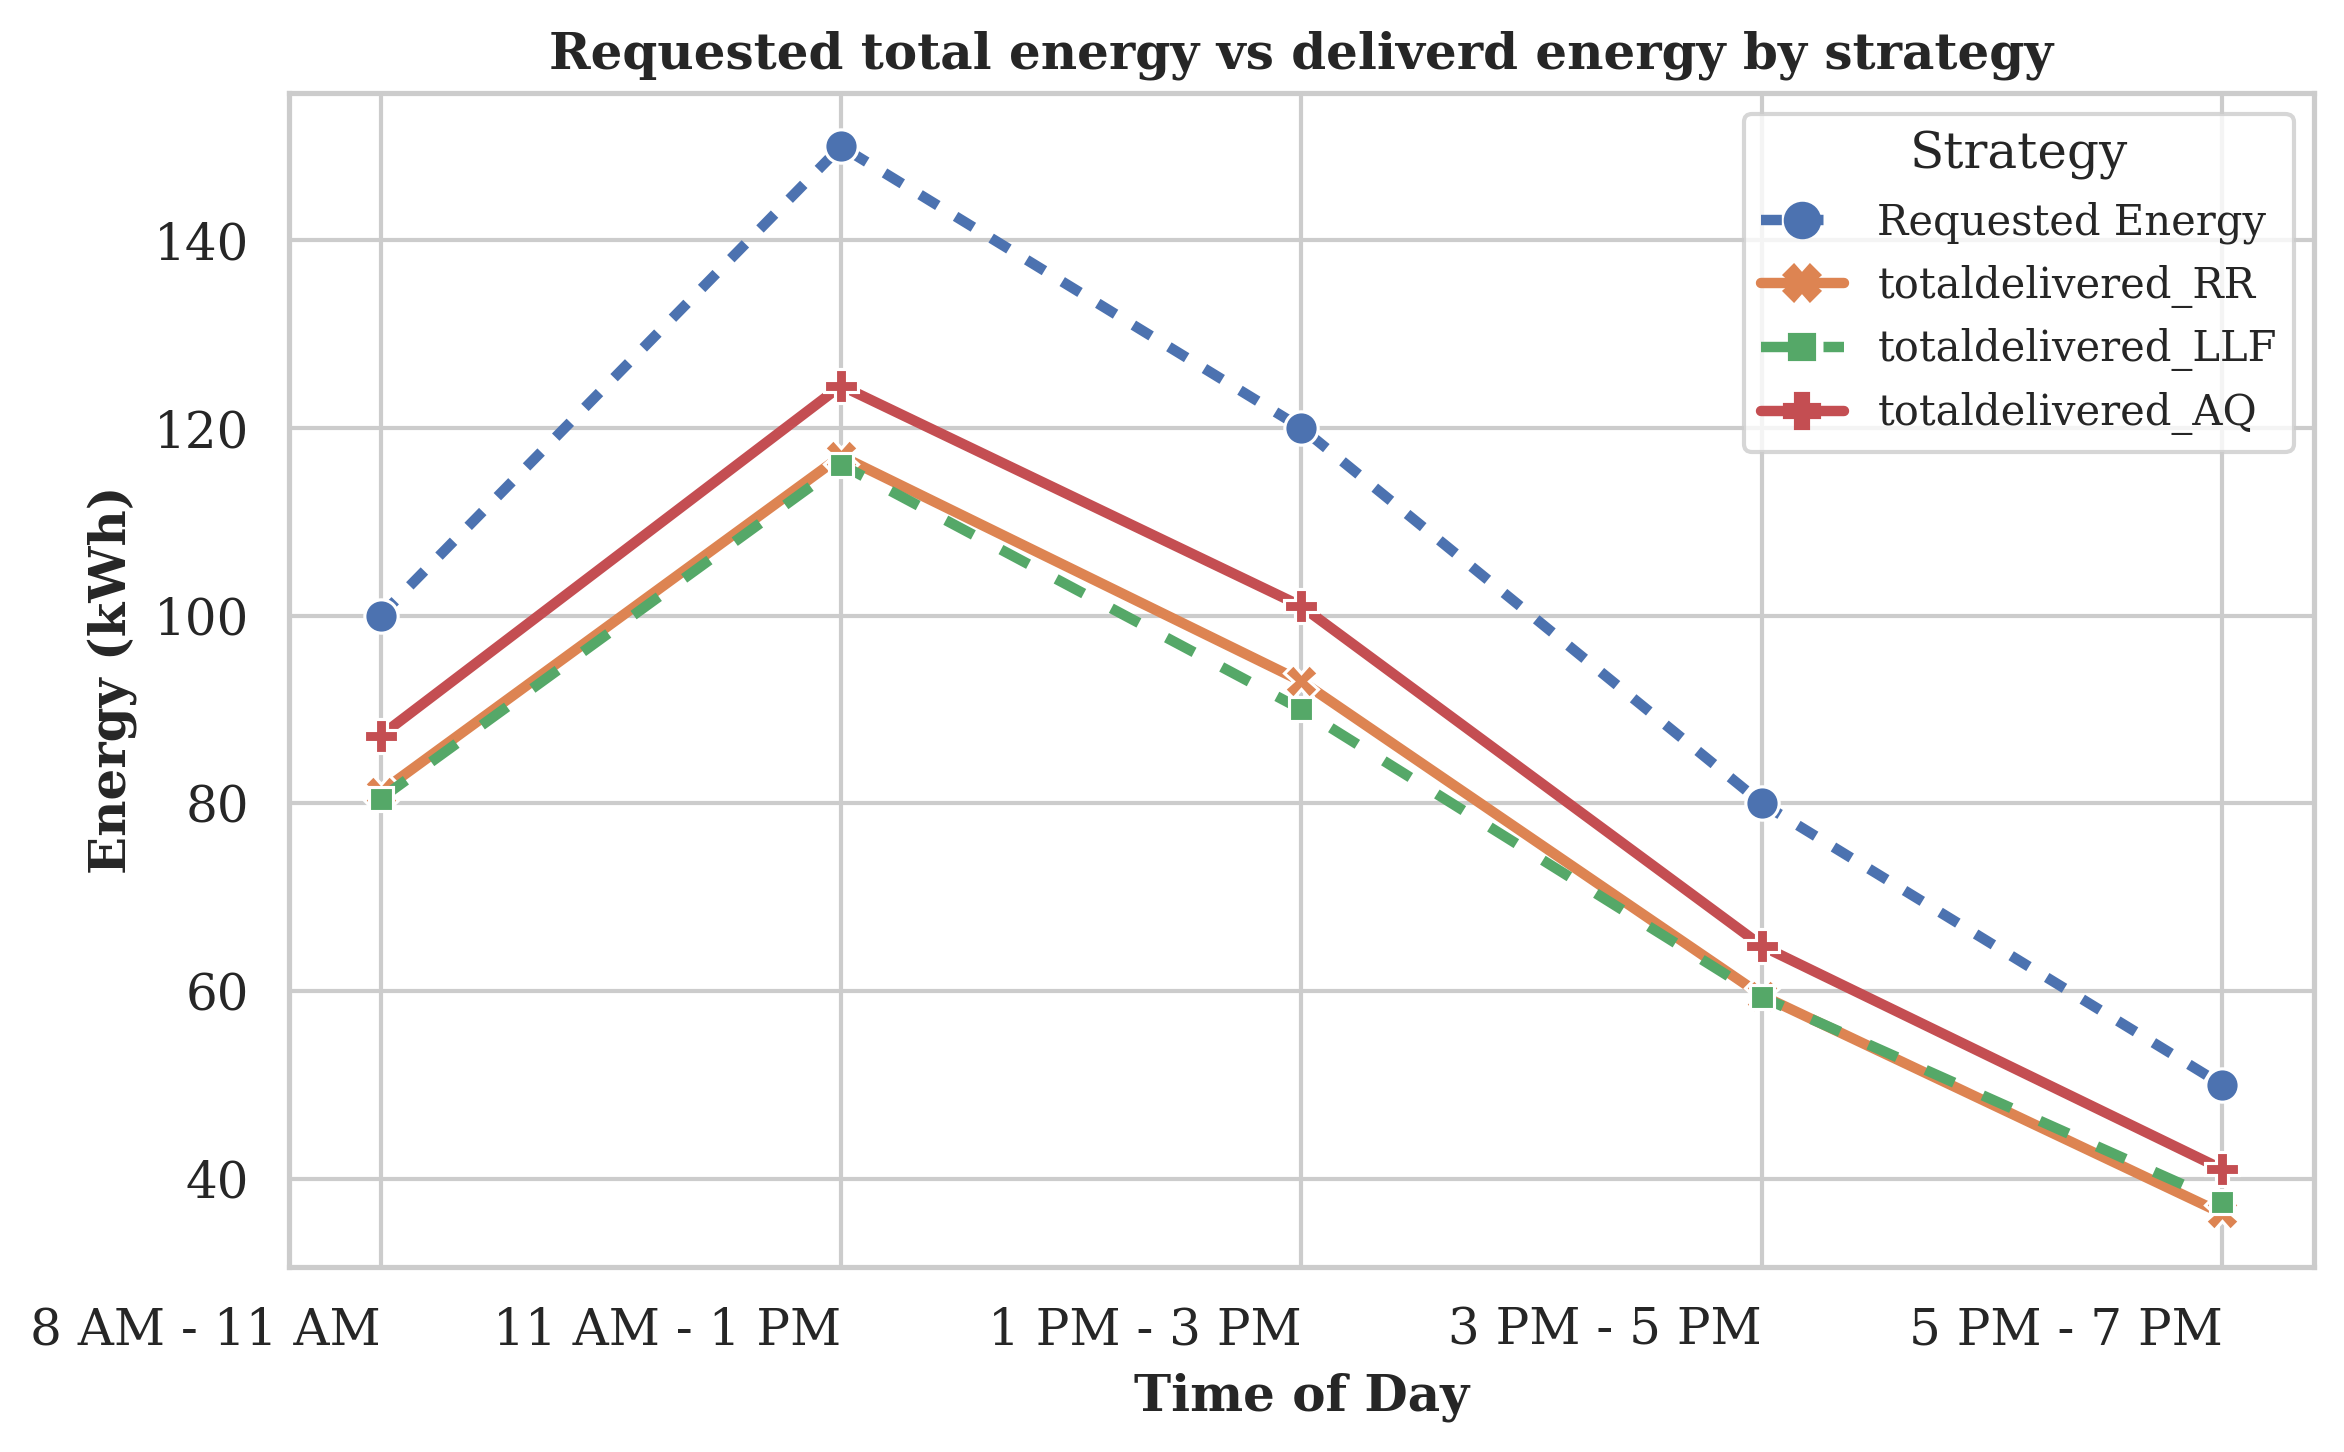

In [3]:
# Step 1: Create a DataFrame from the provided data
data = {
    'Time of day': ['8 AM - 11 AM', '11 AM - 1 PM', '1 PM - 3 PM', '3 PM - 5 PM', '5 PM - 7 PM'],
    'Requested Energy': [100, 150, 120, 80, 50],
    'totaldelivered_RR': [81.2, 117, 93, 59.52, 36.3],
    'totaldelivered_LLF': [80.5, 116.1, 90, 59.36, 37.5],
    'totaldelivered_AQ': [87.2, 124.5, 101, 64.8, 41]
}
df = pd.DataFrame(data)

# Step 2: Reshape the DataFrame from wide to long format for Seaborn
df_long = pd.melt(df, id_vars=['Time of day'], var_name='Strategy', value_name='Energy')

# Step 3: Set the aesthetic style of the plots
sns.set_theme(
    style="whitegrid",
    rc={
        'figure.figsize': (8, 5),
        'figure.dpi': 300,
        'font.family': 'serif',
        'font.size': 12,
        'axes.labelsize': 12,
        'axes.titlesize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'lines.linewidth': 2.5,
        'lines.markersize': 8
    }
)

# Step 4: Define custom styles for the lines to make the reference line dashed
style_dict = {
    "Requested Energy": (2, 2),  # Dotted line: 2 points on, 2 points off
    "totaldelivered_RR": "",           # Solid line
    "totaldelivered_LLF": (3, 3),      # dashed line
    "totaldelivered_AQ": ""            # Solid line
}

fontspec = {
    'fontsize': 12,
    'fontweight': 'bold'
}

# Create the plot using Seaborn
ax = sns.lineplot(
    data=df_long,
    x='Time of day',
    y='Energy',
    hue='Strategy',      # Color lines by strategy
    style='Strategy',    # Vary line style by strategy
    markers=True,        # Add markers to each data point
    dashes=style_dict    # Apply custom dash styles
)

# Step 5: Customize the plot
ax.set_title('Requested total energy vs deliverd energy by strategy', fontsize=12, fontweight='bold')
ax.set_xlabel('Time of Day', fontdict=fontspec)
ax.set_ylabel('Energy (kWh)', fontdict=fontspec)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Strategy', loc='best', fontsize=10)


# Ensure everything fits without overlapping
plt.tight_layout()

# Save the figure to a file
file_basename = "C:\\Users\\s3955218\\OneDrive - RMIT University\\PhD Writing\\Journal\\RQ2\\Simualtion_results\\15evse\\total_energy_delivered_analysis"
plt.savefig(f"{file_basename}.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


#### Energy delivered to non-priority EV

In [ ]:
# Data from simulation results
data = {
    'Time of day': ['8 AM - 11 AM', '11 AM - 1 PM', '1 PM - 3 PM', '3 PM - 5 PM', '5 PM - 7 PM'],
    'Requested Energy': [100, 150, 120, 80, 50],
    'totaldelivered_RR': [81.2, 117, 93, 59.52, 36.3],
    'totaldelivered_LLF': [80.5, 116.1, 90, 59.36, 37.5],
    'totaldelivered_AQ': [87.2, 124.5, 101, 64.8, 41]
}

#### Plotting charging schedule

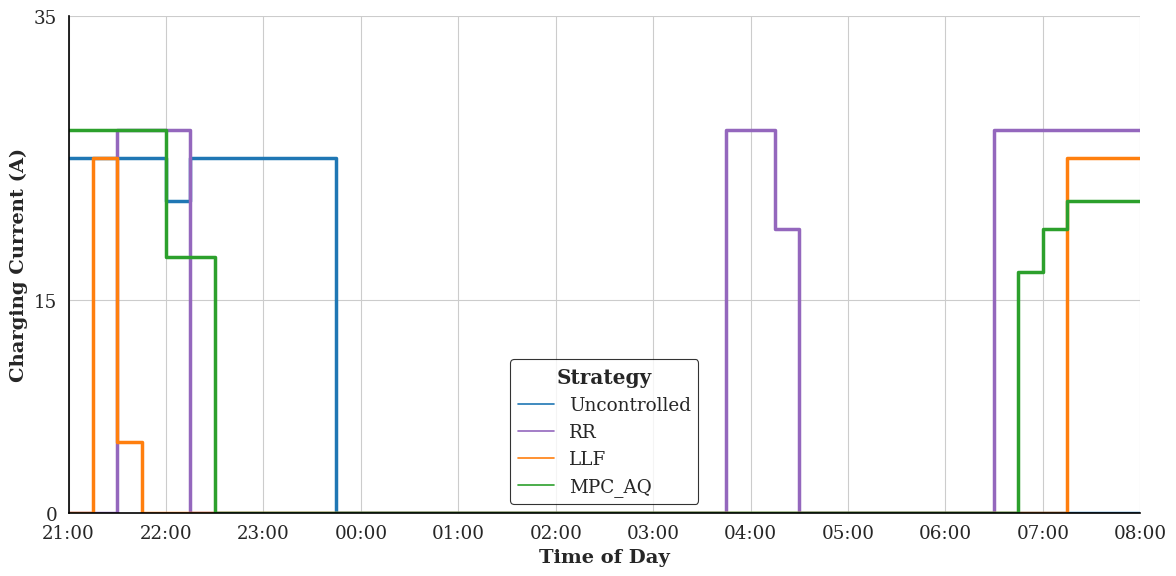

In [5]:
# --- 1. Set Plotting Style for Publication Quality ---
# Use a seaborn theme and context suitable for academic papers.
# We also set the font to a serif font for a classic look.
sns.set_theme(context='paper', style='whitegrid', font_scale=1.5)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2


# --- 2. Generate Time Series Data ---
# Create a time index from 21:00 to 08:00 with a 5-minute frequency.
# This provides enough resolution to capture the details in the example image.
time_index = pd.date_range(start='2025-07-24 21:00', end='2025-07-25 08:00', freq='5min')
num_points = len(time_index)

# Helper function to easily create timestamps for slicing data
def t(hour, minute):
    """Creates a pandas Timestamp for a given hour and minute."""
    # Handle overnight times
    if hour >= 21:
        return pd.Timestamp(f'2025-07-24 {hour:02d}:{minute:02d}')
    else:
        return pd.Timestamp(f'2025-07-25 {hour:02d}:{minute:02d}')

# --- 3. Recreate Charging Profiles Based on the Image ---
# Initialize numpy arrays with zeros for each strategy.
uncontrolled = np.zeros(num_points)
rr = np.zeros(num_points)
llf = np.zeros(num_points)
mpc_aq = np.zeros(num_points)

# Populate 'Uncontrolled' data using boolean indexing
uncontrolled[(time_index >= t(21, 0)) & (time_index < t(22, 0))] = 25.0
uncontrolled[(time_index >= t(22, 0)) & (time_index < t(22, 15))] = 22.0
uncontrolled[(time_index >= t(22, 15)) & (time_index < t(23, 45))] = 25.0

# Populate 'RR' (Round Robin) data
rr[(time_index >= t(21, 30)) & (time_index < t(22, 15))] = 27.0
rr[(time_index >= t(3, 45)) & (time_index < t(4, 15))] = 27.0
rr[(time_index >= t(4, 15)) & (time_index < t(4, 30))] = 20.0
rr[time_index >= t(6, 30)] = 27.0

# Populate 'LLF' (Least Laxity First) data
llf[(time_index >= t(21, 15)) & (time_index < t(21, 30))] = 25.0
llf[(time_index >= t(21, 30)) & (time_index < t(21, 45))] = 5.0
llf[time_index >= t(7, 15)] = 25.0

# Populate 'MPC_AQ' (Model Predictive Control) data
mpc_aq[(time_index >= t(21, 0)) & (time_index < t(22, 0))] = 27.0
mpc_aq[(time_index >= t(22, 0)) & (time_index < t(22, 30))] = 18.0
mpc_aq[(time_index >= t(6, 45)) & (time_index < t(7, 0))] = 17.0
mpc_aq[(time_index >= t(7, 0)) & (time_index < t(7, 15))] = 20.0
mpc_aq[time_index >= t(7, 15)] = 22.0

# --- 4. Create and Structure the DataFrame ---
# Combine all data into a single pandas DataFrame.
df = pd.DataFrame({
    'Time': time_index,
    'Uncontrolled': uncontrolled,
    'RR': rr,
    'LLF': llf,
    'MPC_AQ': mpc_aq
})

# Convert the DataFrame to a "long-form" or "tidy" format, which is ideal for seaborn.
df_long = pd.melt(df, id_vars=['Time'], var_name='Strategy', value_name='Charging Current (A)')

# --- 5. Plot the Data ---
# Create the plot figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color palette to match the original image
palette = {
    'Uncontrolled': '#1f77b4',  # Muted Blue
    'RR': '#9467bd',           # Muted Purple
    'LLF': '#ff7f0e',          # Muted Orange
    'MPC_AQ': '#2ca02c'        # Muted Green
}

# Generate the line plot using seaborn. 'drawstyle' creates the step-plot look.
sns.lineplot(
    data=df_long,
    x='Time',
    y='Charging Current (A)',
    hue='Strategy',
    palette=palette,
    drawstyle='steps-post', # Creates the distinct step-like changes
    linewidth=2.5,
    ax=ax
)

# --- 6. Customize the Plot for Publication ---
# Set axis labels with bold font weight
ax.set_xlabel('Time of Day', fontsize=14, weight='bold')
ax.set_ylabel('Charging Current (A)', fontsize=14, weight='bold')

# Format the x-axis to show time in HH:MM format every hour
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

# Set y-axis ticks and limits
ax.set_yticks([0, 15, 35])
ax.set_ylim(0, 35)
ax.set_xlim(df['Time'].min(), df['Time'].max())

# Customize the legend
legend = ax.legend(title='Strategy', frameon=True, facecolor='white', edgecolor='black', shadow=False)
plt.setp(legend.get_title(), weight='bold')

# Remove the top and right spines for a cleaner look
sns.despine()

# Ensure everything fits without overlapping
plt.tight_layout()

# --- 7. Save and Show the Plot ---
# Save the figure in high resolution (e.g., 300 DPI) and in multiple formats if needed.
# PDF is a vector format, which is great for publications.
# plt.savefig('ev_charging_profiles_combined.png', dpi=300, bbox_inches='tight')
# plt.savefig('ev_charging_profiles_combined.pdf', bbox_inches='tight')

# Display the plot
plt.show()